# The pypath tutorial collection

Before April 2019 on the OmniPath webpage (http://omnipathdb.org/) we had a few tutorials for `pypath`. However over the past years we developed a lot `pypath` and especially recently a number of important points in the interface changed (although we wanted to keep compatibility as much as possible). This is a new comprehensive tutorial which replaced the previous tutorials by April 2019 and has been updated in August 2019.

## Table of contents
* [1: Quick start – How do I build OmniPath data with *pypath*?](#quick-start)
* [2: Quick start – I just want a network quickly and play around with *pypath*](#quick-start-2)
* [3: Quick start – How do I build networks from any data with *pypath*?](#quick-start-3)
    * [3a: Defining input formats](#input-formats)
    * [3b: Creating PyPath object and loading the 2 test files](#toy-example)
* [4: Plotting the network with *igraph*](#plot)
* [5: Building networks](#building-networks)
    * [5a: Which network datasets are pre-defined in pypath?](#network-resources)
* [6: How to access the network](#access-network)
* [7: Directions and signs](#directions)
* [8: Accessing nodes in the network](#nodes)
* [9: Querying relationships with our without causality](#causality)
* [10: Accessing edges by identifiers](#edge-lookup)
* [11: Literature references](#references)
* [12: Translating identifiers](#mapping)
* [13: Enzyme-substrate interactions](#enz-sub)
* [14: Annotations](#annotations)
* [15: Gene Ontology](#gene-ontology)
* [16: Protein complexes](#complexes)
* [17: Saving datasets as pickles](#pickle)
* [18: Network in *pandas.DataFrame*](#network-pandas)
* [19: Log messages and sessions](#log-session)
* [20: BEL export](#bel)
* [21: CellPhoneDB export](#cellphonedb)

## 1: Quick start – How do I build *OmniPath* data with *pypath*? <a class="anchor" id="quick-start"></a>

``pypath`` provides an easy way to build the OmniPath network as it has been described in our paper. At the first time this will take several minutes, because all data will be downloaded from the original providers. Next time pypath will use the data from its cache directory, so the network will build much faster. If you want to load it even faster, you can save it into a pickle dump.

In [10]:
from pypath import main
from pypath import settings

In [ ]:
pa = main.PyPath()
#pa.load_omnipath() # This is commented out because it takes > 1h 
                    # to run it for the first time due to the vast
                    # amount of data download.
                    # Once you populated the cache it still takes
                    # approx. 30 min to build the entire OmniPath
                    # as the process consists of quite some data
                    # processing. If you dump it in a pickle, you
                    # can load the network in < 1 min

## 2: Quick start – I just want a network quickly and play around with *pypath* <a class="anchor" id="quick-start-2"></a>

You can find the predefined formats in the ``pypath.data_formats`` module. For example, to load one resource from there, let's say Signor:

In [2]:
from pypath import main
from pypath import data_formats
pa = main.PyPath()
pa.load_resources({'signor': data_formats.pathway['signor']})

Or to load all *activity flow* resources with *literature references:*

In [3]:
from pypath import main
from pypath import data_formats

In [4]:
pa = main.PyPath()
pa.init_network(data_formats.pathway)

Or to load all *activity flow* resources, including the ones without literature references:

In [5]:
pa = main.PyPath()
pa.init_network(data_formats.pathway_all)

## 3: Quick start – How do I build networks from any data with *pypath*? <a class="anchor" id="quick-start-3"></a>

Here we show how to build a network from your own files. The advantage of building network with pypath is that you don't need to worry about merging redundant elements, neither about different formats and identifiers. Let's say you have two files with network data:

**network1.csv**

    entrezA,entrezB,effect
    1950,1956,inhibition
    5290,207,stimulation
    207,2932,inhibition
    1956,5290,stimulation

**network2.sif**

    EGF + EGFR
    EGFR + PIK3CA
    EGFR + SOS1
    PIK3CA + RAC1
    RAC1 + MAP3K1
    SOS1 + HRAS
    HRAS + MAP3K1
    PIK3CA + AKT1
    AKT1 - GSK3B
    
*Note: you need to create these files in order to load them.*

### 3a: Defining input formats <a class="anchor" id="input-formats"></a>

In [6]:
import pypath
import pypath.input_formats as input_formats

input1 = input_formats.ReadSettings(
    name = 'egf1',
    input = 'network1.csv',
    header = True,
    separator = ',',
    id_col_a = 0,
    id_col_b = 1,
    id_type_a = 'entrez',
    id_type_b = 'entrez',
    sign = (2, 'stimulation', 'inhibition'),
    ncbi_tax_id = 9606,
)

input2 = input_formats.ReadSettings(
    name = 'egf2',
    input = 'network2.sif',
    separator = ' ',
    id_col_a = 0,
    id_col_b = 2,
    id_type_a = 'genesymbol',
    id_type_b = 'genesymbol',
    sign = (1, '+', '-'),
    ncbi_tax_id = 9606,
)

### 3b: Creating PyPath object and loading the 2 test files <a class="anchor" id="toy-example"></a>

In [7]:
inputs = {
    'egf1': input1,
    'egf2': input2
}

pa = main.PyPath()
pa.reload()
pa.init_network(lst = inputs)

## 4: Plotting the network with *igraph* <a class="anchor" id="plot"></a>

Here we use the network created above (because it is reasonable size, not like the networks we could get from most of the network databases). Igraph has excellent plotting capabilities built on top of the *cairo* library.

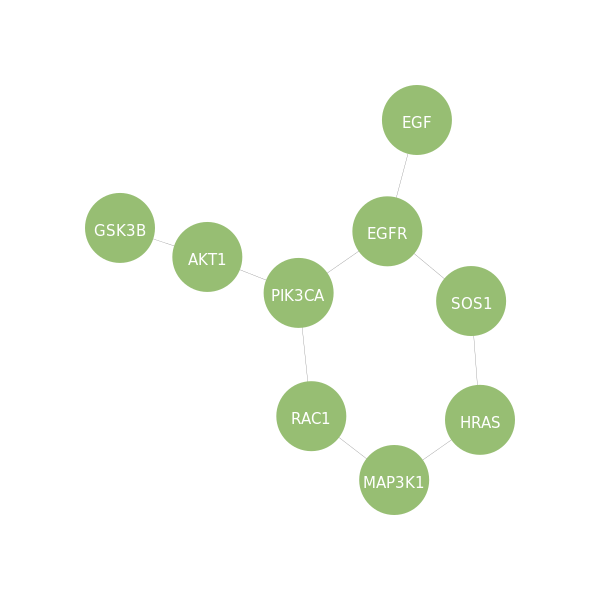

In [8]:
import igraph
plot = igraph.plot(pa.graph, target = 'egf_network.png',
            edge_width = 0.3, edge_color = '#777777',
            vertex_color = '#97BE73', vertex_frame_width = 0,
            vertex_size = 70.0, vertex_label_size = 15,
            vertex_label_color = '#FFFFFF',
            # due to a bug in either igraph or IPython, 
            # vertex labels are not visible on inline plots:
            inline = False, margin = 120)
from IPython.display import Image
Image(filename='egf_network.png')

## 5: Building networks <a class="anchor" id="building-networks"></a>

For this you will need the `PyPath` class from the `pypath.main` module which takes care about building and querying the network. Also you need the `pypath.data_formats` module where you find a number of predefined input settings organized in larger categories (e.g. activity flow, enzyme-substrate, transcriptional regulation, etc). These input settings will tell `pypath` how to download and process the data.

In [20]:
from pypath import main
from pypath import data_formats

For example `data_formats.pathway` is a collection of databases which fit into the activity flow concept, i.e. one protein either stimulates or inhibits the other. It is a dictionary with names as keys and the input settings as values:

In [9]:
data_formats.pathway

{'trip': <pypath.input_formats.ReadSettings at 0x6da2497bc940>,
 'spike': <pypath.input_formats.ReadSettings at 0x6da2497bc9b0>,
 'signalink3': <pypath.input_formats.ReadSettings at 0x6da2497bc9e8>,
 'guide2pharma': <pypath.input_formats.ReadSettings at 0x6da2497bca20>,
 'ca1': <pypath.input_formats.ReadSettings at 0x6da2497bca58>,
 'arn': <pypath.input_formats.ReadSettings at 0x6da2497bcac8>,
 'nrf2': <pypath.input_formats.ReadSettings at 0x6da2497bcb00>,
 'macrophage': <pypath.input_formats.ReadSettings at 0x6da2497bca90>,
 'death': <pypath.input_formats.ReadSettings at 0x6da2497bcb38>,
 'pdz': <pypath.input_formats.ReadSettings at 0x6da2497bcb70>,
 'signor': <pypath.input_formats.ReadSettings at 0x6da2497bcba8>,
 'adhesome': <pypath.input_formats.ReadSettings at 0x6da2497bcbe0>,
 'hpmr': <pypath.input_formats.ReadSettings at 0x6da2497c0908>,
 'cellphonedb': <pypath.input_formats.ReadSettings at 0x6da2497c09e8>,
 'ramilowski2015': <pypath.input_formats.ReadSettings at 0x6da2497c0ac8>

Such a dictionary you can pass to the `init_network` method of the `PyPath` object. Then it will download the data from the original sources, translate the identifiers and merge the networks. Pypath stores all downloaded data in a cache, by default `~/.pypath/cache` in your user's home directory. For this reason when you load a resource for the first time it might take long but next time will be faster as data will be fetched from the cache. First create a `pypath.main.PyPath` object, then build the network:

In [10]:
pa = main.PyPath()
pa.init_network(data_formats.pathway)

You can add more resource sets a similar way:

In [23]:
pa.load_resources(data_formats.ptm)

To load one single resource simply create a one element dict:

In [24]:
pa.load_resources({'matrixdb': data_formats.interaction['matrixdb']})

### 5a: Which network datasets are pre-defined in pypath? <a class="anchor" id="network-resources"></a>

You can find all the pre-defined datasets in the `pypath.data_formats` module. As already we mentined above, the `pathway` dataset contains the literature curated activity flow resources. This was the original focus of pypath and OmniPath, however since then we added a great variety of other kinds of resource definitions. Here we give an overview of these.

* `data_formats.pathway`: activity flow networks with literature references
* `data_formats.activity_flow`: synonym for `pathway`
* `data_formats.pathway_noref`: activity flow networks without literature references
* `data_formats.pathway_all`: all activity flow data
* `data_formats.ptm`: enzyme-substrate interaction networks with literature references
* `data_formats.enzyme_substrate`: synonym for `ptm`
* `data_formats.ptm_noref`: enzyme-substrate networks without literature references
* `data_formats.ptm_all`: all enzyme-substrate data
* `data_formats.interaction`: undirected interactions from both literature curated and high-throughput collections (e.g. IntAct, BioGRID)
* `data_formats.interaction_misc`: undirected, high-scale interaction networks without the constraint of having any literature reference (e.g. the unbiased human interactome screen from the Vidal lab)
* `data_formats.transcription_onebyone`: transcriptional regulation databases (TF-target interactions) with all databases downloaded directly and processed by `pypath`
* `data_formats.transcription`: transcriptional regulation only from the DoRothEA data
* `data_formats.mirna_target`: miRNA-mRNA interactions from literature curated resources
* `data_formats.tf_mirna`: transcriptional regulation of miRNA from literature curated resources
* `data_formats.lncrna_protein`: lncRNA-protein interactions from literature curated datasets
* `data_formats.ligand_receptor`: ligand-receptor interactions from both literature curated and other kinds of resources
* `data_formats.pathwaycommons`: the PathwayCommons database
* `data_formats.reaction`: process description databases; not guaranteed to work at this moment
* `data_formats.reaction_misc`: alternative definitions to load process description databases; not guaranteed to work at this moment
* `data_formats.small_molecule_protein`: signaling interactions between small molecules and proteins

To see the list of the resources in a dataset, you can check the dict keys or the `name` attribute of each element:

In [17]:
data_formats.pathway.keys()

dict_keys(['trip', 'spike', 'signalink3', 'guide2pharma', 'ca1', 'arn', 'nrf2', 'macrophage', 'death', 'pdz', 'signor', 'adhesome', 'hpmr', 'cellphonedb', 'ramilowski2015'])

In [19]:
[resource.name for resource in data_formats.pathway.values()]

['TRIP',
 'SPIKE',
 'SignaLink3',
 'Guide2Pharma',
 'CA1',
 'ARN',
 'NRF2ome',
 'Macrophage',
 'DeathDomain',
 'PDZBase',
 'Signor',
 'Adhesome',
 'HPMR',
 'CellPhoneDB',
 'Ramilowski2015']

## 6: How to access the network <a class="anchor" id="access-network"></a>

Once you built a network you can use it for various purposes and write your own scripts for further processing or analysis. The network is represented by an `igraph` object ([igraph.org](http://igraph.org/)):

In [25]:
pa.graph

Number of edges and nodes:

In [12]:
pa.ecount, pa.vcount

(22101, 5184)

The edge and vertex sequences you can access in the `es` and `vs` attributes, you can iterate these or index by integers. The edge and vertex attributes you can access by string keys. E.g. get the sources of edge 0:

In [15]:
pa.graph.es[81]['sources']

{'SPIKE', 'SignaLink3'}

## 7: Directions and signs <a class="anchor" id="directions"></a>

By default the `igraph` object is undirected but it carries all direction information in Python objects assigned to each edge. Pypath can convert it to a directed `igraph` object, but you still need the `Direction` objects to have the signs, as `igraph` has no signed network representation. Certain methods need the directed `igraph` object and they will automatically create it, but you can create it manually:

In [40]:
pa.get_directed()

You find the directed network in the `pa.dgraph` attribute:

In [41]:
pa.dgraph

Now let's take a look on the `pypath.main.Direction` objects which contain details about directions and signs. First as an example, select a random edge:

In [54]:
edge = pa.graph.es[3241]

The `Direction` object is in the `dirs` edge attribute:

In [55]:
d = edge['dirs']

It has a method to print its content a human readable way:

In [56]:
print(pa.graph.es[3241]['dirs'])

Directions and signs of interaction between Q13489 and Q13546

	Q13489 ===> Q13546 :: SPIKE, SignaLink3
	Q13489 <=== Q13546 :: SignaLink3
	Q13489 =+=> Q13546 :: SPIKE



From this we see the databases phosphoELM and Signor agree that protein `P17252` has an effect on `Q15139` and Signor in addition tells us this effect is stimulatory. However in your scripts you can query the `Direction` objects a number of ways. Each `Direction` object calls the two possible directions either straight or reverse:

In [57]:
d.straight

('Q13489', 'Q13546')

In [58]:
d.reverse

('Q13546', 'Q13489')

It can tell you if one of these directions is supported by any of the network resources:

In [59]:
d.get_dir(d.straight)

True

Or it can return those resources:

In [60]:
d.get_dir(d.straight, sources = True)

{'SPIKE', 'SignaLink3'}

The opposite direction is not supported by any resource:

In [61]:
d.get_dir(d.reverse, sources = True)

{'SignaLink3'}

Similar way the signs can be queried. The returned pair of boolean values mean if the interaction in this direction is stimulatory or inhibitory, respectively.

In [62]:
d.get_sign(d.straight)

[True, False]

Or you can ask whether it is inhibition:

In [63]:
d.is_inhibition(d.straight)

False

Or if the interaction is directed at all:

In [64]:
d.is_directed()

True

Sometimes resources don't agree, for example one tells an interaction is inhibition while according to others it is stimulation; or one tells A effects B and another resource the other way around. Here we preserve all these potentially contradicting information in the `Direction` object and at the end you decide what to do with it depending on your purpose. If you want to get rid of ambiguity there is a method to get a consensus direction and sign which returns the attributes the most resources agree on: 

In [65]:
d.consensus_edges()

[['Q13489', 'Q13546', 'directed', 'positive']]

## 8: Accessing nodes in the network <a class="anchor" id="nodes"></a>

In `igraph` the vertices are numbered but this numbering can change at certain operations. Instead the we can use the vertex attributes. In `PyPath` for proteins the `name` attribute is UniProt ID by default and the `label` is Gene Symbol.

In [66]:
pa.graph.vs['name'][:5]

['P63000', 'O00161', 'Q9GZU1', 'Q96H20', 'Q9NWB7']

In [67]:
pa.graph.vs['label'][:5]

['RAC1', 'SNAP23', 'MCOLN1', 'SNF8', 'IFT57']

The `PyPath` object offers a number of helper methods to access the nodes by their names. For example, `uniprot` or `up` returns the `igraph.Vertex` for a UniProt ID:

In [68]:
type(pa.up('P00533'))

igraph.Vertex

Similarly `genesymbol` or `gs` for Gene Symbols:

In [36]:
type(pa.gs('ESR1'))

igraph.Vertex

Each of these has a "plural" version:

In [69]:
len(list(pa.gss(['MTOR', 'ATG16L2', 'ULK1'])))

3

And a generic method where you can mix UniProts and Gene Symbols:

In [70]:
len(list(pa.proteins(['MTOR', 'P00533'])))

2

## 9: Querying relationships with our without causality <a class="anchor" id="causality"></a>

Above you could see how to query the directions and names of individual edges and nodes. Building on top of these, other methods give a way to query causality, i.e. which proteins are affected by an other one, and which others are its regulators. The example below returns the nodes PIK3CA is stimulated by, the `gs` prefix tells we query by the Gene Symbol:

In [71]:
pa.gs_stimulated_by('PIK3CA')

It returns a so called `_NamedVertexSeq` object, which you can get a series of `igraph.Vertex` objects or Gene Symbols or UniProt IDs from:

In [72]:
list(pa.gs_stimulated_by('PIK3CA').gs())[:5]

['NTRK1', 'SRC', 'GAB1', 'PTPN11', 'NRAS']

In [73]:
list(pa.gs_stimulated_by('PIK3CA').up())[:5]

['P04629', 'P12931', 'Q13480', 'Q06124', 'P01111']

Note, the names of these methods are a bit contraintuitive, the for example the `gs_stimulates` returns the genes stimulated by PIK3CA:

In [74]:
list(pa.gs_stimulates('PIK3CA').gs())[:5]

['MTOR', 'AKT1']

In [75]:
'PIK3CA' in set(pa.affected_by('AKT1').gs())

True

There are many similary methods, `inhibited_by` returns negative regulators, `affected_by` does not consider +/- signs, without `gs_` and `up_` prefixes you can provide either of these identifiers, `neighbors` does not consider the direction. At the end `.gs()` converts the result for a list of Gene Symbols, `up()` to UniProts, `.ids()` to vertex IDs and by default it yields `igraph.Vertex` objects:

In [76]:
list(pa.neighbors('AKT1').ids())[:5]

[0, 32, 38, 50, 69]

Finally, with `neighborhood` methods return the indirect neighborhood in custom number of steps (however size of the neighborhood increases rapidly with number of steps):

In [77]:
print(list(pa.neighborhood('ATG3', 1).gs()))

['ATG3', 'GABARAP', 'ATG5', 'GABARAPL2', 'ATG12', 'ATG7', 'CFLAR', 'MAP1LC3B', 'MAP1LC3A', 'TP63']


In [78]:
print(list(pa.neighborhood('ATG3', 2).gs()))

['ATG3', 'GABARAP', 'ATG5', 'GABARAPL2', 'ATG12', 'ATG7', 'CFLAR', 'MAP1LC3B', 'MAP1LC3A', 'TP63', 'TRPV1', 'CLTC', 'FNBP1', 'NBR1', 'BNIP3L', 'ATG13', 'SQSTM1', 'RB1CC1', 'FYCO1', 'ATG4B', 'ULK1', 'ULK2', 'DVL2', 'OPTN', 'IFIH1', 'BCL2L1', 'ATF4', 'TP73', 'WDFY3', 'CAPN2', 'FADD', 'CAPN1', 'ATG10', 'DDX58', 'DDIT3', 'MAVS', 'ATG16L1', 'ATG16L2', 'TECPR1', 'PPHLN1', 'COX5B', 'UBA5', 'NEK9', 'ATG4A', 'BNIP3', 'NIPSNAP2', 'EP300', 'FOXO1', 'HSF1', 'TAX1BP3', 'ITCH', 'RIPK1', 'FAS', 'NFKB1', 'PRKCB', 'RIPK2', 'TRAF2', 'AR', 'CASP8', 'AKT1', 'MAP3K14', 'CASP10', 'PRKACA', 'MAP1B', 'EGR1', 'MAPK8', 'KEAP1', 'ZKSCAN3', 'TFEB', 'P27791', 'TBC1D5', 'E2F1', 'MAP1A', 'RAB3GAP1', 'HNRNPAB', 'FBXW7', 'ATM', 'TP53', 'MDM2', 'RPS6KB1', 'CDK2', 'IKBKB', 'ATG9A', 'BECN1']


In [79]:
len(list(pa.neighborhood('ATG3', 3).gs()))

1735

In [80]:
len(list(pa.neighborhood('ATG3', 4).gs()))

5344

## 10: Accessing edges by identifiers <a class="anchor" id="edge-lookup"></a>

Just like nodes also edges can be accessed by identifiers like Gene Symbols. `get_edge` returns an `igraph.Edge` if the edge exists otherwise `None`.

In [81]:
type(pa.get_edge('EGF', 'EGFR'))

igraph.Edge

In [82]:
type(pa.get_edge('EGF', 'P00533'))

igraph.Edge

In [83]:
type(pa.get_edge('EGF', 'AKT1'))

NoneType

In [84]:
print(pa.get_edge('EGF', 'EGFR')['dirs'])

Directions and signs of interaction between P00533 and P01133

	P00533 <=== P01133 :: SPIKE, HPMR, SignaLink3
	P00533 <=+= P01133 :: SPIKE, SignaLink3



## 11: Literature references <a class="anchor" id="references"></a>

Select a random edge and in the `references` attribute you find a list of references:

In [86]:
edge = pa.get_edge( 'MAP1LC3B', 'SQSTM1')
edge['references']

Each reference has a PubMed ID:

In [132]:
edge['references'][0].pmid

'17580304'

In [133]:
edge['references'][0].open()

These 3 references come from 3 different databases, but there must be 2 overlaps between them:

In [87]:
edge['refs_by_source']

{'NRF2ome': {<pypath.refs.Reference at 0x6ee605f6dd98>},
 'ELM': {<pypath.refs.Reference at 0x6ee5fdc8cd98>,
  <pypath.refs.Reference at 0x6ee605f6dd68>}}

## 12: Translating identifiers <a class="anchor" id="mapping"></a>

The `pypath.mapping` module is for ID translation, most of the time you can simply call the `map_name` method:

In [20]:
from pypath import mapping
mapping.map_name('P00533', 'uniprot', 'genesymbol')

{'EGFR'}

In [21]:
mapping.map_name('8408', 'entrez', 'uniprot')

{'O75385'}

A number of mapping tables are predefined and loaded automatically. However it does not translate in 2 steps if no direct translation table is available. For example *Entrez* to *Gene Symbol* you can translate this way:

In [22]:
mapping.map_names(
    mapping.map_name('8408', 'entrez', 'uniprot'),
    'uniprot',
    'genesymbol',
)

{'ULK1'}

By default the `map_name` function returns a `set` because it accounts for ambiguous mapping. However most often the ID translation is unambiguous, and you want to retrieve only one ID. The `map_name0` returns a string, even in case of ambiguity, it returns a random element from the resulted set:

In [23]:
mapping.map_name0('GABARAPL3', 'genesymbol', 'uniprot')

'Q9BY60'

## 13: Enzyme-substrate interactions <a class="anchor" id="enz-sub"></a>

The `pypath.ptm` module builds a database of enzyme-substrate interactions.

In [ ]:
from pypath import ptm
ptm_db = ptm.get_db()

Here you got a dictionary with pairs of UniProt IDs as keys and a list of special objects representing enzyme-substrate interactions as values:

In [ ]:
print(ptm_db.enz_sub[('Q13177', 'P01236')][0])

Alternatively the enzyme-substrate interactions can be assigned to network edges:

In [ ]:
pa.load_ptms2()

In [ ]:
print(pa.graph.es['ptm'][444][0])

## 14: Annotations <a class="anchor" id="annotations"></a>

This module provides various annotations about the function and location of the proteins.

In [24]:
from pypath import annot
a = annot.get_db()

OmniPath contains annotations from 27 resources. These provide various information about the characteristics of the proteins, e.g. their localization or function. The `AnnotationTable` object loads all annotations by default, optionally you can limit this to certain resources. For example, if you only want to load the pathway membership annotations from SIGNOR, SignaLink, NetPath and KEGG, you can provide the names of the appropriate classes:

In [25]:
pathways = annot.AnnotationTable(
    protein_sources = (
        'SignalinkPathways',
        'KeggPathways',
        'NetpathPathways',
        'SignorPathways',
    )
)

The `AnnotationTable` object provides methods to query all resources together, or build a boolean array out of them. To see all annotations of one protein:

In [26]:
pathways.all_annotations('P00533')

[SignalinkPathway(pathway='TNF/Apoptosis', core=True),
 SignalinkPathway(pathway='RTK', core=True),
 SignalinkPathway(pathway='WNT', core=True),
 SignalinkPathway(pathway='IIP', core=True),
 KeggPathway(pathway='Proteoglycans in cancer'),
 KeggPathway(pathway='Pathways in cancer'),
 KeggPathway(pathway='Pancreatic cancer'),
 KeggPathway(pathway='Central carbon metabolism in cancer'),
 KeggPathway(pathway='Phospholipase D signaling pathway'),
 KeggPathway(pathway='Human cytomegalovirus infection'),
 KeggPathway(pathway='Oxytocin signaling pathway'),
 KeggPathway(pathway='Hepatocellular carcinoma'),
 KeggPathway(pathway='Bladder cancer'),
 KeggPathway(pathway='Endocrine resistance'),
 KeggPathway(pathway='Prostate cancer'),
 KeggPathway(pathway='Estrogen signaling pathway'),
 KeggPathway(pathway='Breast cancer'),
 KeggPathway(pathway='ErbB signaling pathway'),
 KeggPathway(pathway='Non-small cell lung cancer'),
 KeggPathway(pathway='FoxO signaling pathway'),
 KeggPathway(pathway='Glioma'

In [27]:
pathways.create_dataframe = True
pathways.make_dataframe()

In [32]:
pathways.df[:10]

SignaLink3  SignaLink3__  SignaLink3__BCR  SignaLink3__GPCR  \
A0A024RBG1       False         False            False             False   
A0A075B6H9       False         False            False             False   
A0A075B6I0       False         False            False             False   
A0A075B6I1       False         False            False             False   
A0A075B6I4       False         False            False             False   
A0A075B6I9       False         False            False             False   
A0A075B6J1       False         False            False             False   
A0A075B6J6       False         False            False             False   
A0A075B6J9       False         False            False             False   
A0A075B6K0       False         False            False             False   

            SignaLink3__HH  SignaLink3__HIPPO  SignaLink3__Hedgehog  \
A0A024RBG1           False              False                 False   
A0A075B6H9           False              False                 False   
A0A075B6I0           False              False                 False   
A0A075B6I1           False              False                 False   
A0A075B6I4           False              False                 False   
A0A075B6I9           False              False                 False   
A0A075B6J1           False              False                 False   
A0A075B6J6           False              False                 False   
A0A075B6J9           False              False                 False   
A0A075B6K0           False              False                 False   

            SignaLink3__Hippo  SignaLink3__IIP  SignaLink3__JAK/STAT  ...  \
A0A024RBG1              False            False                 False  ...   
A0A075B6H9              False            False                 False  ...   
A0A075B6I0              False            False                 False  ...   
A0A075B6I1              False            False                 False  ...   
A0A075B6I4              False            False                 False  ...   
A0A075B6I9              False            False                 False  ...   
A0A075B6J1              False            False                 False  ...   
A0A075B6J6              False            False                 False  ...   
A0A075B6J9              False            False                 False  ...   
A0A075B6K0              False            False                 False  ...   

            CellPhoneDB_complex__Cytokine receptor IL3 family  \
A0A024RBG1                                              False   
A0A075B6H9                                              False   
A0A075B6I0                                              False   
A0A075B6I1                                              False   
A0A075B6I4                                              False   
A0A075B6I9                                              False   
A0A075B6J1                                              False   
A0A075B6J6                                              False   
A0A075B6J9                                              False   
A0A075B6K0                                              False   

            CellPhoneDB_complex__Cytokine receptor IL6 family  \
A0A024RBG1                                              False   
A0A075B6H9                                              False   
A0A075B6I0                                              False   
A0A075B6I1                                              False   
A0A075B6I4                                              False   
A0A075B6I9                                              False   
A0A075B6J1                                              False   
A0A075B6J6                                              False   
A0A075B6J9                                              False   
A0A075B6K0                                              False   

            CellPhoneDB_complex__Cytokine receptor IL6 family, IL12 subfamily  \
A0A024RBG1                                 

The `AnnotationTable` object contains the resource specific annotation objects:

In [33]:
a.annots

{'CPAD': <pypath.annot.Cpad at 0x68fbbbff5dd0>,
 'DisGeNet': <pypath.annot.Disgenet at 0x68fb8e004a10>,
 'SignaLink3': <pypath.annot.SignalinkPathways at 0x68fb8e8975d0>,
 'CancerGeneCensus': <pypath.annot.CancerGeneCensus at 0x68fb9b855810>,
 'Matrisome': <pypath.annot.Matrisome at 0x68fb8e853310>,
 'KEGG': <pypath.annot.KeggPathways at 0x68fb9c004fd0>,
 'Integrins': <pypath.annot.Integrins at 0x68fb9a2903d0>,
 'Ramilowski_location': <pypath.annot.Ramilowski2015Location at 0x68fb9a4e6110>,
 'Signor': <pypath.annot.SignorPathways at 0x68fb92faf690>,
 'CancerSEA': <pypath.annot.Cancersea at 0x68fb91f236d0>,
 'CSPA': <pypath.annot.CellSurfaceProteinAtlas at 0x68fbadcf5790>,
 'Membranome': <pypath.annot.Membranome at 0x68fbb8013d10>,
 'Guide2Pharma': <pypath.annot.GuideToPharmacology at 0x68fba9a143d0>,
 'OPM': <pypath.annot.Opm at 0x68fb92f40cd0>,
 'Kirouac2010': <pypath.annot.Kirouac2010 at 0x68fbada4c990>,
 'Zhong2015': <pypath.annot.Zhong2015 at 0x68fbcb89c050>,
 'HPA': <pypath.annot.

For each of these you can query the names of the fields, their possible values and the set of proteins annotated with any combination of the values:

In [34]:
matrisome = a.annots['Matrisome']

In [35]:
matrisome.get_names()

('mainclass', 'subclass', 'subsubclass')

In [36]:
matrisome.get_values('subclass')

{'Collagens',
 'ECM Glycoproteins',
 'ECM Regulators',
 'ECM-affiliated Proteins',
 'Proteoglycans',
 'Secreted Factors',
 'n/a'}

In [37]:
matrisome.get_subset(subclass = 'Collagens')

{'A2A2Y8',
 'A2A352',
 'A2AAS7',
 'A6NCT7',
 'A6NDR9',
 'A6NEQ6',
 'A6NMZ7',
 'A6PVD9',
 'A8MWQ5',
 'A8MXH5',
 'A8TX70',
 'B1AKJ1',
 'B1AKJ3',
 'B4DZ39',
 'B7ZBI4',
 'B7ZBI5',
 'C9JBL3',
 'C9JH44',
 'C9JMN2',
 'C9JNG9',
 'C9JPW4',
 'C9JTN9',
 Complex Collagen type I homotrimer: COMPLEX:P02452,
 Complex HT_DM_Cluster278: COMPLEX:P02452-P02462-P08572-P29400-P53420-Q01955-Q02388-Q14031-Q17RW2-Q8NFW1,
 Complex Collagen type I trimer: COMPLEX:P02452-P08123,
 Complex Collagen type II trimer: COMPLEX:P02458,
 Complex Collagen type XI trimer variant 1: COMPLEX:P02458-P12107-P13942,
 Complex: COMPLEX:P02458-P20908-P25067-P29400,
 Complex: COMPLEX:P02458-P25067-P29400,
 Complex Collagen type III trimer: COMPLEX:P02461,
 Complex: COMPLEX:P02462,
 Complex Collagen type IV trimer variant 1: COMPLEX:P02462-P08572,
 Complex Collagen type XI trimer variant 2: COMPLEX:P05997-P12107,
 Complex Collagen type XI trimer variant 3: COMPLEX:P05997-P12107-P20908,
 Complex Collagen type V trimer variant 1: COMP

## 15: Gene Ontology <a class="anchor" id="gene-ontology"></a>

`pypath.go` is an almost standalone module for management of the Gene Ontology tree and annotations. The main objects here are `GeneOntology` and `GOAnnotation`. The former represents the ontology tree, i.e. terms and their relationships, the latter their assignment to gene products. Both provides many versatile methods for querying.

In [38]:
from pypath import go
goa = go.GOAnnotation()

In [39]:
goa.ontology # the GeneOntology object

In [40]:
goa # the GOAnnotation object

Among many others, the most versatile method is `select` which is able to select the annotated gene products by various expressions built from GO terms or IDs. It understands `AND`, `OR`, `NOT` and parentheses.

In [41]:
query = """(cell surface OR
        external side of plasma membrane OR
        extracellular region) AND
        (regulation of transmembrane transporter activity OR
        channel regulator activity)"""
result = goa.select(query)
print(list(result)[:7])

['P63244', 'Q07699', 'P46934', 'P62258', 'Q16651', 'P57796', 'Q9ULB1']


In [42]:
goa.ontology.get_all_descendants('GO:0005576')

{'GO:0001507',
 'GO:0001527',
 'GO:0003351',
 'GO:0003355',
 'GO:0005201',
 'GO:0005576',
 'GO:0005577',
 'GO:0005582',
 'GO:0005583',
 'GO:0005584',
 'GO:0005585',
 'GO:0005586',
 'GO:0005587',
 'GO:0005588',
 'GO:0005590',
 'GO:0005591',
 'GO:0005592',
 'GO:0005595',
 'GO:0005596',
 'GO:0005599',
 'GO:0005601',
 'GO:0005602',
 'GO:0005604',
 'GO:0005606',
 'GO:0005607',
 'GO:0005608',
 'GO:0005609',
 'GO:0005610',
 'GO:0005611',
 'GO:0005612',
 'GO:0005614',
 'GO:0005615',
 'GO:0005616',
 'GO:0006858',
 'GO:0006859',
 'GO:0006860',
 'GO:0009519',
 'GO:0010367',
 'GO:0016914',
 'GO:0016942',
 'GO:0020003',
 'GO:0020004',
 'GO:0020005',
 'GO:0020006',
 'GO:0030020',
 'GO:0030021',
 'GO:0030023',
 'GO:0030197',
 'GO:0030345',
 'GO:0030934',
 'GO:0030935',
 'GO:0030938',
 'GO:0031012',
 'GO:0031395',
 'GO:0032311',
 'GO:0032579',
 'GO:0033165',
 'GO:0033166',
 'GO:0034358',
 'GO:0034359',
 'GO:0034360',
 'GO:0034361',
 'GO:0034362',
 'GO:0034363',
 'GO:0034364',
 'GO:0034365',
 'GO:00343

## 16: Protein complexes <a class="anchor" id="complexes"></a>

The `pypath.complex` module builds a non-redundant list of complexes from 10 original resources. Complexes are unique considering their set of components, and optionally carry stoichiometry information.

In [3]:
from pypath import complex
complexdb = complex.get_db()


	=== d i s c l a i m e r ===

	All data accessed through this module,
	either as redistributed copy or downloaded using the
	programmatic interfaces included in the present module,
	are free to use at least for academic research or
	education purposes.
	Please be aware of the licenses of all the datasets
	you use in your analysis, and please give appropriate
	credits for the original sources when you publish your
	results. To find out more about data sources please
	look at `pypath.descriptions` or
	http://omnipathdb.org/info and 
	`pypath.data_formats.urls`.

[2019-08-30 16:36:40] [pypath] 
	- session ID: `hca38`
	- working directory: `/home/denes/Dokumentumok/norwich2019`
	- logfile: `/home/denes/Dokumentumok/norwich2019/pypath_log/pypath-hca38.log`
	- pypath version: 0.8.30



In [4]:
complexdb

To retrieve all complexes containing a specific protein, here MTOR:

In [5]:
complexdb.proteins['P42345']

{Complex: COMPLEX:O00141-O15530-O75879-P23443-P34931-P42345-Q6R327-Q8N122-Q9BPZ7-Q9BVC4-Q9H672,
 Complex: COMPLEX:O00141-O15530-P07900-P23443-P31749-P31751-P42345-P78527-Q05513-Q05655-Q6R327-Q8N122-Q9BPZ7-Q9BVC4,
 Complex: COMPLEX:O00141-O15530-P0CG47-P0CG48-P23443-P42345-Q15118-Q6R327-Q8N122-Q96BR1-Q9BPZ7-Q9BVC4,
 Complex: COMPLEX:O00141-O15530-P23443-P42345-Q15118-Q6R327-Q8N122-Q96BR1-Q96J02-Q9BPZ7-Q9BVC4,
 Complex: COMPLEX:O00141-O75879-P0CG48-P23443-P34931-P42345-P62753-Q6R327-Q8N122-Q9BPZ7-Q9BVC4-Q9NY26,
 Complex: COMPLEX:O00141-P0CG48-P23443-P36894-P42345-P62942-P68106-Q15427-Q6R327-Q8N122-Q9BPZ7-Q9BVC4,
 Complex: COMPLEX:O00141-P0CG48-P23443-P42345-P46781-P62753-Q6R327-Q8N122-Q96KQ7-Q9BPZ7-Q9BVC4-Q9NY26,
 Complex: COMPLEX:O00141-P0CG48-P23443-P42345-P62753-P62942-Q6R327-Q8N122-Q9BPZ7-Q9BVC4-Q9NY26,
 Complex: COMPLEX:O00141-P0CG48-P23443-P42345-P62753-Q15172-Q6R327-Q8IW41-Q9BPZ7-Q9BVC4-Q9H672,
 Complex: COMPLEX:O00141-P0CG48-P23443-P42345-P62753-Q6R327-Q70Z35-Q8N122-Q8TCU6-Q9BPZ7

Note some of the complexes have human readable names, these are preferred at printing if available from any of the databases. Otherwise the complexes are labelled by `COMPLEX:list-of-components`.

Take a closer look on one complex object. The hash of the is equivalent with the string representation below, where the UniProt IDs are unique and alphabetically sorted. Hence you can look up complexes using strings as keys despite the dict keys are indeed `pypath.intera.Complex` objects:

In [6]:
cplex = complexdb.complexes['COMPLEX:P42345-Q13451']

In [7]:
cplex.components # stoichiometry

{'Q13451': 2, 'P42345': 2}

In [8]:
cplex.sources # resources

{'PDB'}

## 17: Saving datasets as pickles <a class="anchor" id="pickle"></a>

The large datasets above are compiled from many resources. Even if these are already available in the cache, the data processing often takes longer than convenient, e.g. few minutes. Most of the data integration objects in `pypath` provide methods to save and load their contents as pickle dumps.

In [ ]:
# for `pypath.main.PyPath` objects:
pa.save_network('mynetwork.pickle') # save
pa.init_network(pfile = 'mynetwork.pickle') # load
# for `pypath.annot.AnnotationTable` objects:
a.save_to_pickle('myannots.pickle')
a = annot.AnnotationTable(pickle_file = 'myannots.pickle')
# for `pypath.complex.ComplexAggregator` objects:
complexdb.save_to_pickle('mycomplexes.pickle')
complexdb = complex.ComplexAggregator(pickle_file = 'mycomplexes.pickle')

## 18: Network in *pandas.DataFrame* <a class="anchor" id="network-pandas"></a>

The original implementation of the network in `pypath` is based on `igraph`. Work is ongoing to provide a new and more flexible network builder which will result `pandas.DataFrame` and to make `pypath` independent from `igraph`. As a temporary solution you can easily convert the network to a `pandas.DataFrame` using the `pypath.network` module.

In [ ]:
from pypath import main
from pypath import data_formats
from pypath import network

In [ ]:
pa = main.PyPath()
pa.init_network(data_formats.pathway_all)

In [ ]:
net = network.Network.from_igraph(pa)

In [ ]:
net.records[:10]

## 19: Log messages and sessions <a class="anchor" id="log-session"></a>

Now `pypath` has an improved logger. All modules sends messages to a log file named by default by the session ID (a 5 char random string). The default path to the log file is `./pypath_log/pypath-xxxxx.log` where `xxxxx` is the session ID. When you import `pypath` the welcome message tells you the session ID and the log file location.

In [1]:
import pypath


	=== d i s c l a i m e r ===

	All data accessed through this module,
	either as redistributed copy or downloaded using the
	programmatic interfaces included in the present module,
	are free to use at least for academic research or
	education purposes.
	Please be aware of the licenses of all the datasets
	you use in your analysis, and please give appropriate
	credits for the original sources when you publish your
	results. To find out more about data sources please
	look at `pypath.descriptions` or
	http://omnipathdb.org/info and 
	`pypath.data_formats.urls`.

[2019-09-02 13:23:28] [pypath] 
	- session ID: `vc1lm`
	- working directory: `/home/denes/Dokumentumok/norwich2019`
	- logfile: `/home/denes/Dokumentumok/norwich2019/pypath_log/pypath-vc1lm.log`
	- pypath version: 0.8.30



Also by default this is the only message `pypath` prints directly to the console, otherwise it only messages to the log. Here is how you can access the session ID and the logger:

In [2]:
pypath.session_mod.session

In [3]:
pypath.session_mod.session.log.fname

'/home/denes/Dokumentumok/norwich2019/pypath_log/pypath-vc1lm.log'

In [4]:
pypath.session_mod.session.label

'vc1lm'

From your scripts and apps you can also easily send messages to the logfile:

In [5]:
pypath.session_mod.session.log.msg('Greetings from the pypath tutorial notebook! :)')

In [6]:
with open(pypath.session_mod.session.log.fname, 'r') as fp:
    messages = fp.read().split('\n')

In [7]:
print('\n'.join(messages))

[2019-09-02 13:23:28] Welcome!
[2019-09-02 13:23:28] Logger started, logging into `/home/denes/Dokumentumok/norwich2019/pypath_log/pypath-vc1lm.log`.
[2019-09-02 13:23:28] Session `vc1lm` started.
[2019-09-02 13:23:28] [pypath] 
	- session ID: `vc1lm`
	- working directory: `/home/denes/Dokumentumok/norwich2019`
	- logfile: `/home/denes/Dokumentumok/norwich2019/pypath_log/pypath-vc1lm.log`
	- pypath version: 0.8.30
[2019-09-02 13:23:40] Greetings from the pypath tutorial notebook! :)



If you create a class inheriting from `pypath.session_mod.Logger` it will be automatically connected to the session logger:

In [9]:
class ChildOfLogger(pypath.session_mod.Logger):
    
    def __init__(self):
        
        pypath.session_mod.Logger.__init__(self, name = 'child')
    
    def say_something(self):
        
        self._log('Have a nice day! :D')


col = ChildOfLogger()
col.say_something()

with open(pypath.session_mod.session.log.fname, 'r') as fp:
    messages = fp.read().split('\n')

print('\n'.join(messages))

[2019-09-02 13:23:28] Welcome!
[2019-09-02 13:23:28] Logger started, logging into `/home/denes/Dokumentumok/norwich2019/pypath_log/pypath-vc1lm.log`.
[2019-09-02 13:23:28] Session `vc1lm` started.
[2019-09-02 13:23:28] [pypath] 
	- session ID: `vc1lm`
	- working directory: `/home/denes/Dokumentumok/norwich2019`
	- logfile: `/home/denes/Dokumentumok/norwich2019/pypath_log/pypath-vc1lm.log`
	- pypath version: 0.8.30
[2019-09-02 13:23:40] Greetings from the pypath tutorial notebook! :)
[2019-09-02 13:24:00] [child] Have a nice day! :D



Note, the log messages are flushed by default in every 2 seconds, but their timestamps always refer to the exact time the message has been sent. A second stamp shows the name of the sending submodule or class.

Finally see a log from a real `pypath` session:

In [10]:
from pypath import main
from pypath import data_formats
pa = main.PyPath()
pa.init_network(data_formats.pathway)

In [11]:
with open(pypath.session_mod.session.log.fname, 'r') as fp:
    messages = fp.read().split('\n')

print('\n'.join(messages[-20:]))

[2019-09-02 13:26:15] [network] Edge attribute `negative` has only None values
[2019-09-02 13:26:17] [network] load_resources(): all resources have been loaded, current number of nodes: 5243, edges: 22796
[2019-09-02 13:26:17] [network] Removing duplicate edges...
[2019-09-02 13:26:18] [network] After duplicate edge removal: number of nodes: 5243, edges: 22214
[2019-09-02 13:26:18] [network] After removing unmapped nodes: number of nodes: 5243, edges: 22214
[2019-09-02 13:26:18] [network] Updating network component lookup dictionaries.
[2019-09-02 13:26:18] [network] Updating vertex labels.
[2019-09-02 13:26:18] [network] After removing unknown organism nodes: number of nodes: 5243, edges: 22214
[2019-09-02 13:26:18] [network] Updating network component lookup dictionaries.
[2019-09-02 13:26:18] [network] Updating vertex labels.
[2019-09-02 13:26:18] [network] Checking network components against reference lists.
[2019-09-02 13:26:18] [reflists] ReferenceListManager has been created.
[2

## 20: BEL export <a class="anchor" id="bel"></a>

Biological Expression Language (BEL, https://bel-commons.scai.fraunhofer.de/) is a versatile description language to capture relationships between various biological entities spanning wide range of the levels of biological organization. `pypath` has a dedicated module to convert the network and the enzyme-substrate interactions to BEL format:

In [12]:
from pypath import main
from pypath import data_formats
from pypath import bel

In [ ]:
pa = main.PyPath()
pa.init_network(data_formats.pathway)

You can provide one or more resources to the `Bel` class. Supported resources currently are `pypath.main.PyPath` and `pypath.ptm.PtmAggregator`.

In [13]:
b = bel.Bel(resource = pa)

From the resources we compile a `BELGraph` object which provides a Python interface for various operations and you can also export the data in BEL format:

In [14]:
b.main()

In [15]:
b.bel_graph

In [16]:
b.bel_graph.summarize()

OmniPath vNone
Number of Nodes: 5213
Number of Edges: 71410
Number of Citations: 12533
Number of Authors: 0
Network Density: 2.63E-03
Number of Components: 94
Number of Warnings: 0


In [17]:
b.export_relationships('omnipath_pathways.bel')

In [18]:
with open('omnipath_pathways.bel', 'r') as fp:
    bel_str = fp.read()

In [19]:
print(bel_str[:333])

Subject	Predicate	Object
P05937	directlyIncreases	Q9NQA5
P05937	directlyIncreases	Q9NQA5
Q9NQA5	directlyIncreases	Q9H1D0
Q9NQA5	directlyIncreases	Q9H1D0
Q9NQA5	directlyIncreases	Q9H1D0
Q9NQA5	directlyIncreases	Q9H1D0
Q9NQA5	directlyIncreases	Q8TDD5
Q9NQA5	directlyIncreases	Q8TDD5
Q9UEF7	directlyIncreases	Q9NQA5
Q9UEF7	directlyIncre


## 21: CellPhoneDB export <a class="anchor" id="cellphonedb"></a>

CellPhoneDB is a statistical method and a database for inferring inter-cellular communication pathways between specific cell types from single-cell data. OmniPath/pypath uses CellPhoneDB as a resource for interaction, protein complex and annotation data. Apart from this, pypath is able to export its data in the appropriate format to provide input for the CellPhoneDB Python module. For this you can use the `pypath.cellphonedb` module:

In [2]:
from pypath import cellphonedb
from pypath import settings

settings.setup(network_expand_complexes = False)

Here you can provide parameters for the network or provide an already built network. Also you can provide the datasets as pickles to make them load really fast. Otherwise this step will take quite long.

In [3]:
c = cellphonedb.CellPhoneDB()

You can access each of the CellPhoneDB input files as a `pandas.DataFrame` and also they've been exported to csv files. For example the `interaction_input.csv` contains interactions from all the resources used for building the network (here Signor, SingnaLink, etc.):

In [4]:
c.interaction_dataframe[:10]

id_cp_interaction partner_a partner_b protein_name_a protein_name_b  \
0        CPI-000001    Q13976    P50552     KGP1_HUMAN     VASP_HUMAN   
1        CPI-000001    Q13976    Q92934     KGP1_HUMAN      BAD_HUMAN   
2        CPI-000002    Q13976    Q13164     KGP1_HUMAN     MK07_HUMAN   
3        CPI-000003    Q13976    Q13153     KGP1_HUMAN     PAK1_HUMAN   
4        CPI-000004    Q13976    Q02156     KGP1_HUMAN     KPCE_HUMAN   
5        CPI-000005    P17252    Q13976     KPCA_HUMAN     KGP1_HUMAN   
6        CPI-000006    Q13976    P04792     KGP1_HUMAN    HSPB1_HUMAN   
7        CPI-000007    Q13976    P11831     KGP1_HUMAN      SRF_HUMAN   
8        CPI-000008    Q13976    Q16539     KGP1_HUMAN     MK14_HUMAN   
9        CPI-000009    Q13976    Q14847     KGP1_HUMAN    LASP1_HUMAN   

    annotation_strategy                              source  
0  KEGG,OmniPath,Signor  PMID: ,PMID: 2576312,PMID: 4679200  
1         KEGG,OmniPath                              PMID:   
2         OmniPath,Wang                              PMID:   
3   OmniPath,SignaLink3                      PMID: 16490784  
4         KEGG,OmniPath                              PMID:   
5       OmniPath,Signor                      PMID: 12609995  
6       OmniPath,Signor                      PMID: 19593530  
7       OmniPath,Signor                      PMID: 19778940  
8         KEGG,OmniPath                              PMID:   
9       OmniPath,Signor                      PMID: 12571245

The proteins and complexes are annotated (transmembrane, peripheral, secreted, etc.) using data from the `pypath.intercell` module (identical to the http://omnipathdb.org/intercell query of the web service):

In [15]:
c.protein_dataframe[:10]

uniprot protein_name  transmembrane  peripheral  secreted secreted_desc  \
0  O14905  WNT9B_HUMAN          False       False      True                 
1  Q14790  CASP8_HUMAN           True       False      True                 
2  Q92729  PTPRU_HUMAN           True        True     False                 
3  P01258   CALC_HUMAN          False       False      True                 
4  P01833   PIGR_HUMAN           True        True     False                 
5  Q9HCX4  TRPC7_HUMAN          False       False     False                 
6  Q10588   BST1_HUMAN           True        True      True                 
7  Q92845  KIFA3_HUMAN          False       False     False                 
8  O60258  FGF17_HUMAN          False       False      True                 
9  P51679   CCR4_HUMAN           True        True     False                 

  secreted_highlight  receptor receptor_desc  integrin other other_desc tags  \
0                        False                   False                         
1                        False                   False                         
2                         True                   False                         
3                        False                   False                         
4                         True                   False                         
5                        False                   False                         
6                        False                   False                         
7                        False                   False                         
8                        False                   False                         
9                         True                   False                         

  tags_reason tags_description  
0                               
1                               
2                               
3                               
4                               
5                               
6                               
7                               
8                               
9